In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df_building = pd.read_csv("D:\Summer2025\citylearn_challenge_2022_phase_all\citylearn_challenge_2022_phase_all\Building_1.csv")  # replace with actual file

In [17]:
df_building.head()

,Month,Hour,Day Type,Daylight Savings Status,Indoor Temperature [C],Average Unmet Cooling Setpoint Difference [C],Indoor Relative Humidity [%],Equipment Electric Power [kWh],DHW Heating [kWh],Cooling Load [kWh],Heating Load [kWh],Solar Generation [W/kW]
0,7.0,24.0,7.0,0,NaN,NaN,NaN,2.275800,0,0,0,0.0
1,8.0,1.0,1.0,0,NaN,NaN,NaN,0.851167,0,0,0,0.0
2,8.0,2.0,1.0,0,NaN,NaN,NaN,0.834600,0,0,0,0.0
3,8.0,3.0,1.0,0,NaN,NaN,NaN,0.838167,0,0,0,0.0
4,8.0,4.0,1.0,0,NaN,NaN,NaN,1.478433,0,0,0,0.0


In [19]:
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 12 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Month                                          8760 non-null   float64
 1   Hour                                           8760 non-null   float64
 2   Day Type                                       8760 non-null   float64
 3   Daylight Savings Status                        8760 non-null   int64  
 4   Indoor Temperature [C]                         0 non-null      float64
 5   Average Unmet Cooling Setpoint Difference [C]  0 non-null      float64
 6   Indoor Relative Humidity [%]                   0 non-null      float64
 7   Equipment Electric Power [kWh]                 8760 non-null   float64
 8   DHW Heating [kWh]                              8760 non-null   int64  
 9   Cooling Load [kWh]                             8760 

In [20]:
df_building = df_building.dropna(axis=1, how='all')  # or fillna() if needed

In [21]:
print(df_building.dtypes)

Month                             float64
Hour                              float64
Day Type                          float64
Daylight Savings Status             int64
Equipment Electric Power [kWh]    float64
DHW Heating [kWh]                   int64
Cooling Load [kWh]                  int64
Heating Load [kWh]                  int64
Solar Generation [W/kW]           float64
dtype: object


In [22]:
print(df_building.isna().sum())

Month                             0
Hour                              0
Day Type                          0
Daylight Savings Status           0
Equipment Electric Power [kWh]    0
DHW Heating [kWh]                 0
Cooling Load [kWh]                0
Heating Load [kWh]                0
Solar Generation [W/kW]           0
dtype: int64


In [23]:
print(df_building.nunique())

Month                               12
Hour                                24
Day Type                             7
Daylight Savings Status              1
Equipment Electric Power [kWh]    8556
DHW Heating [kWh]                    1
Cooling Load [kWh]                   1
Heating Load [kWh]                   1
Solar Generation [W/kW]           4168
dtype: int64


In [24]:
correlation = df_building.corr()

In [25]:
# Display correlation with Equipment Electric Power
print("Correlation with Equipment Electric Power [kWh]:")
print(correlation['Equipment Electric Power [kWh]'].sort_values(ascending=False))

Correlation with Equipment Electric Power [kWh]:
Equipment Electric Power [kWh]    1.000000
Hour                              0.225890
Month                             0.054213
Day Type                          0.053194
Solar Generation [W/kW]           0.011268
Daylight Savings Status                NaN
DHW Heating [kWh]                      NaN
Cooling Load [kWh]                     NaN
Heating Load [kWh]                     NaN
Name: Equipment Electric Power [kWh], dtype: float64


C:\Users\PMYLS\anaconda3\envs\machinelearning\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


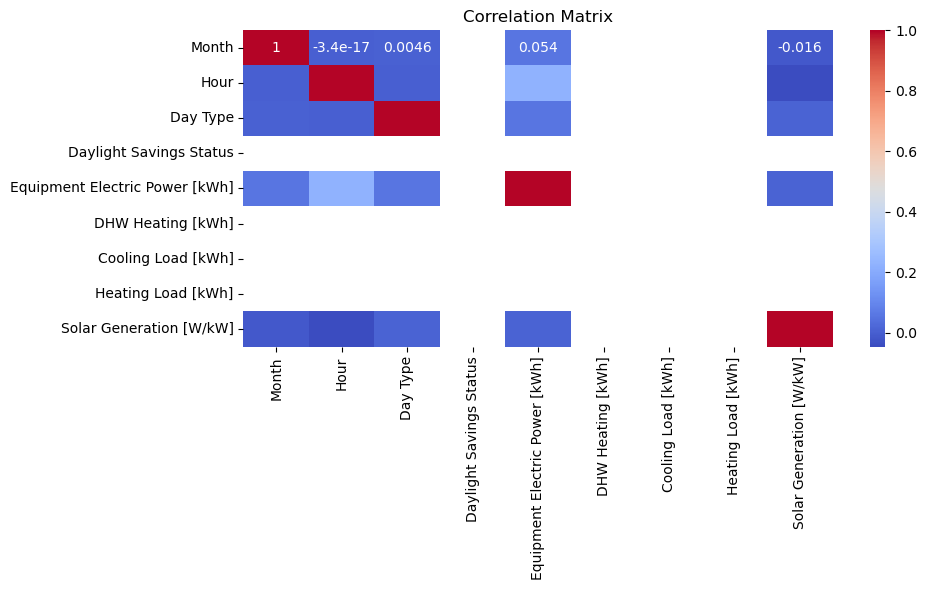

In [26]:
# Plot heatmap
plt.figure(figsize=(10,6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

In [27]:
# Load building data and external datasets
df_weather = pd.read_csv('D:\Summer2025\citylearn_challenge_2022_phase_all\citylearn_challenge_2022_phase_all\weather.csv')
df_pricing = pd.read_csv('D:\Summer2025\citylearn_challenge_2022_phase_all\citylearn_challenge_2022_phase_all\pricing.csv')
df_carbon = pd.read_csv('D:\Summer2025\citylearn_challenge_2022_phase_all\citylearn_challenge_2022_phase_all\carbon_intensity.csv')

In [28]:
# Merge by timestamp
df = pd.concat([df_building, df_weather, df_pricing, df_carbon], axis=1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 30 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Month                                           8760 non-null   float64
 1   Hour                                            8760 non-null   float64
 2   Day Type                                        8760 non-null   float64
 3   Daylight Savings Status                         8760 non-null   int64  
 4   Equipment Electric Power [kWh]                  8760 non-null   float64
 5   DHW Heating [kWh]                               8760 non-null   int64  
 6   Cooling Load [kWh]                              8760 non-null   int64  
 7   Heating Load [kWh]                              8760 non-null   int64  
 8   Solar Generation [W/kW]                         8760 non-null   float64
 9   Outdoor Drybulb Temperature [C]          

In [30]:
correlation = df.corr()

In [31]:
# Display correlation with Equipment Electric Power
print("Correlation with Equipment Electric Power [kWh]:")
print(correlation['Equipment Electric Power [kWh]'].sort_values(ascending=False))

Correlation with Equipment Electric Power [kWh]:
Equipment Electric Power [kWh]                    1.000000
24h Prediction Electricity Pricing [$]            0.268580
Electricity Pricing [$]                           0.259013
Hour                                              0.225890
kg_CO2/kWh                                        0.207066
Outdoor Drybulb Temperature [C]                   0.151466
24h Prediction Outdoor Drybulb Temperature [C]    0.146409
6h Prediction Relative Humidity [%]               0.140232
12h Prediction Relative Humidity [%]              0.108027
24h Prediction Relative Humidity [%]              0.055432
Month                                             0.054213
Day Type                                          0.053194
Relative Humidity [%]                             0.050908
6h Prediction Outdoor Drybulb Temperature [C]     0.032991
24h Prediction Diffuse Solar Radiation [W/m2]     0.031538
Diffuse Solar Radiation [W/m2]                    0.029555
6h Pred

C:\Users\PMYLS\anaconda3\envs\machinelearning\lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


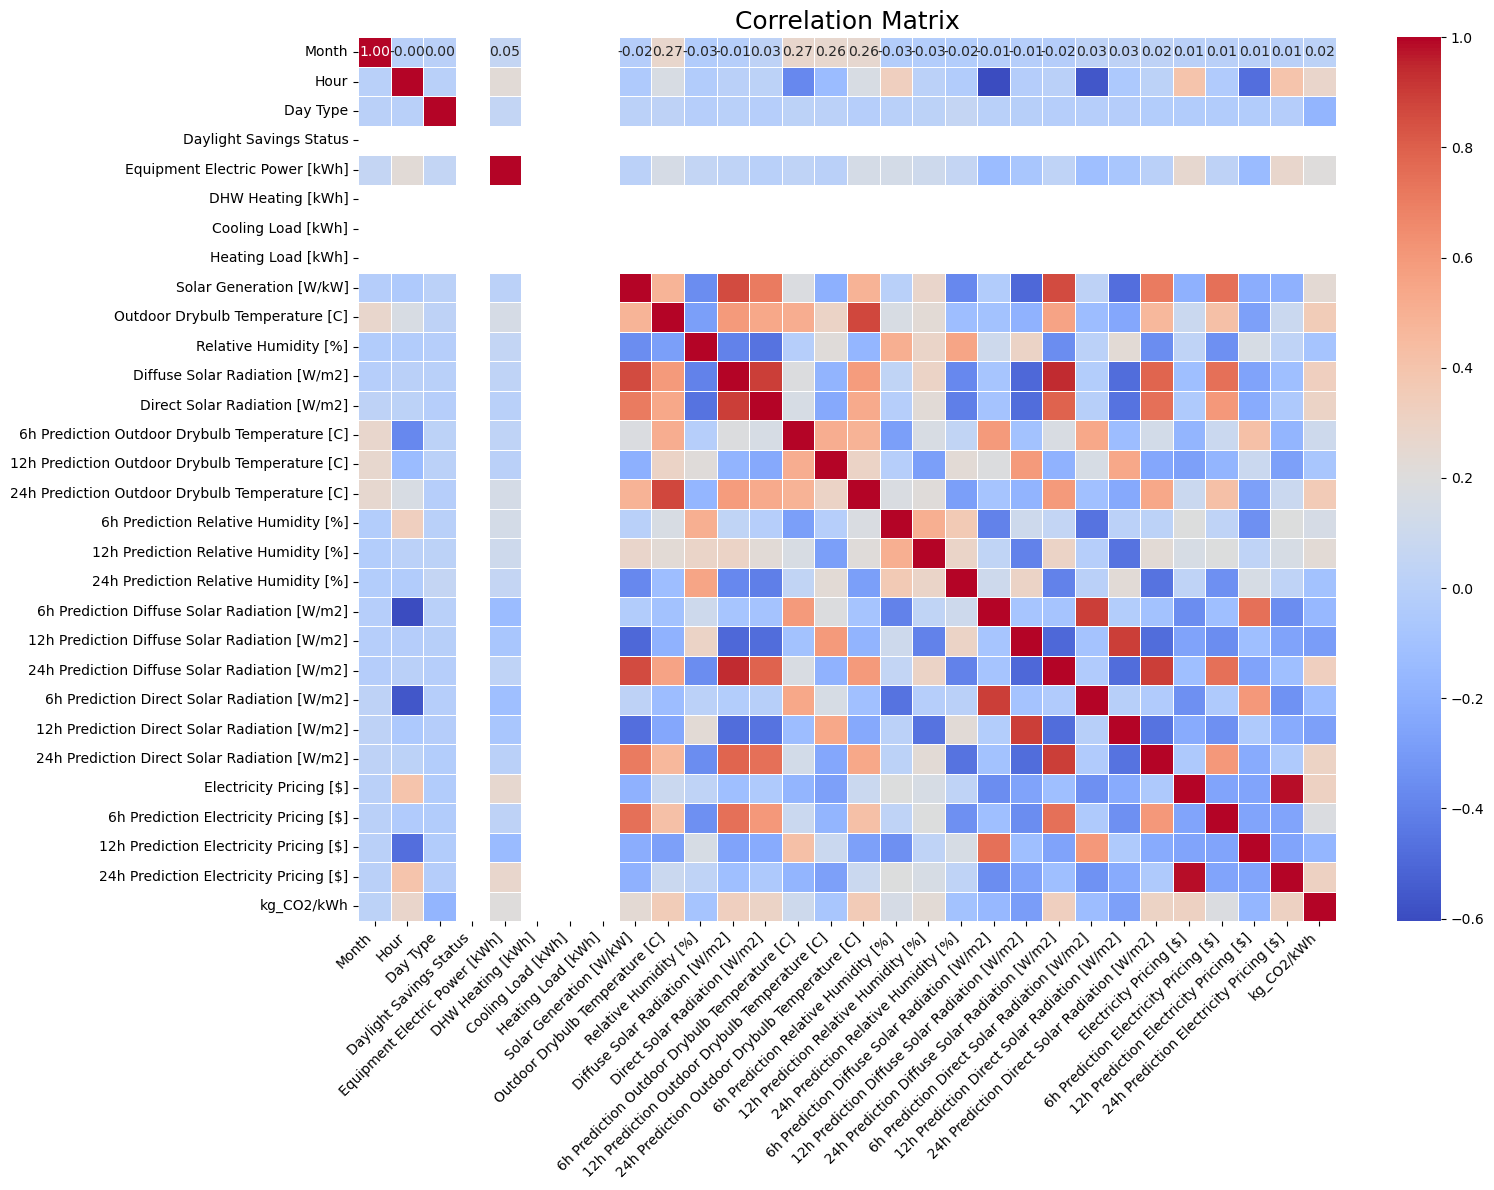

In [32]:
plt.figure(figsize=(16, 12))  # Bigger canvas
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix", fontsize=18)
plt.xticks(rotation=45, ha='right')  # Rotate x-labels
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


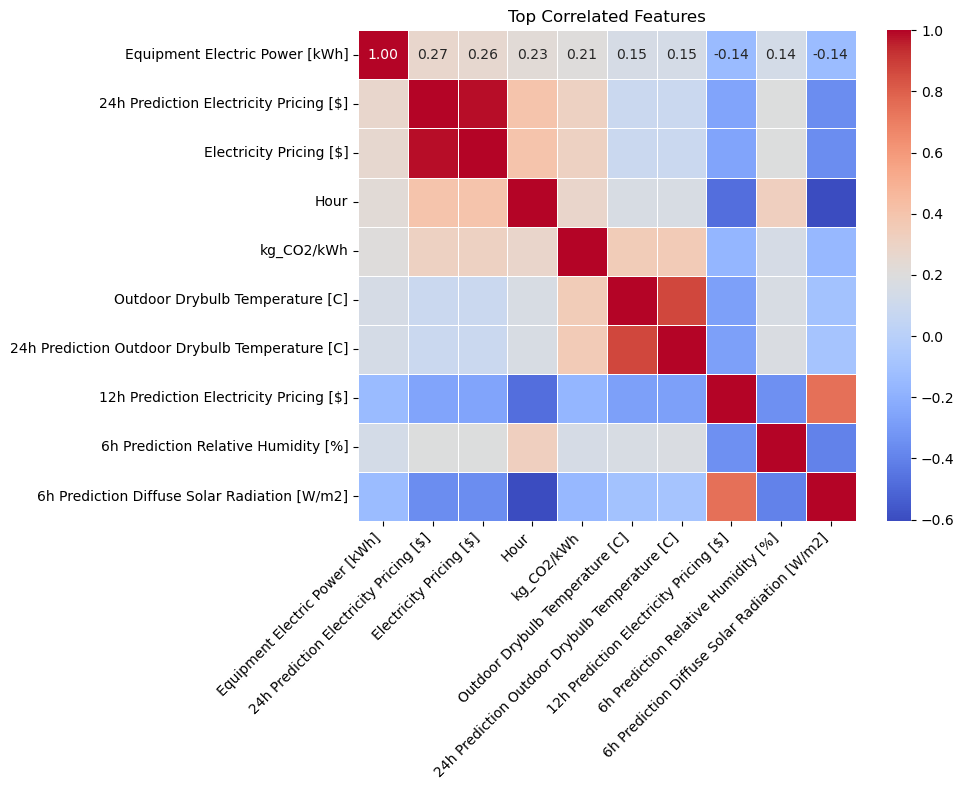

In [33]:
top_features = correlation['Equipment Electric Power [kWh]'].abs().sort_values(ascending=False).head(10).index
corr_subset = correlation.loc[top_features, top_features]
plt.figure(figsize=(10, 8))
sns.heatmap(corr_subset, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Top Correlated Features")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


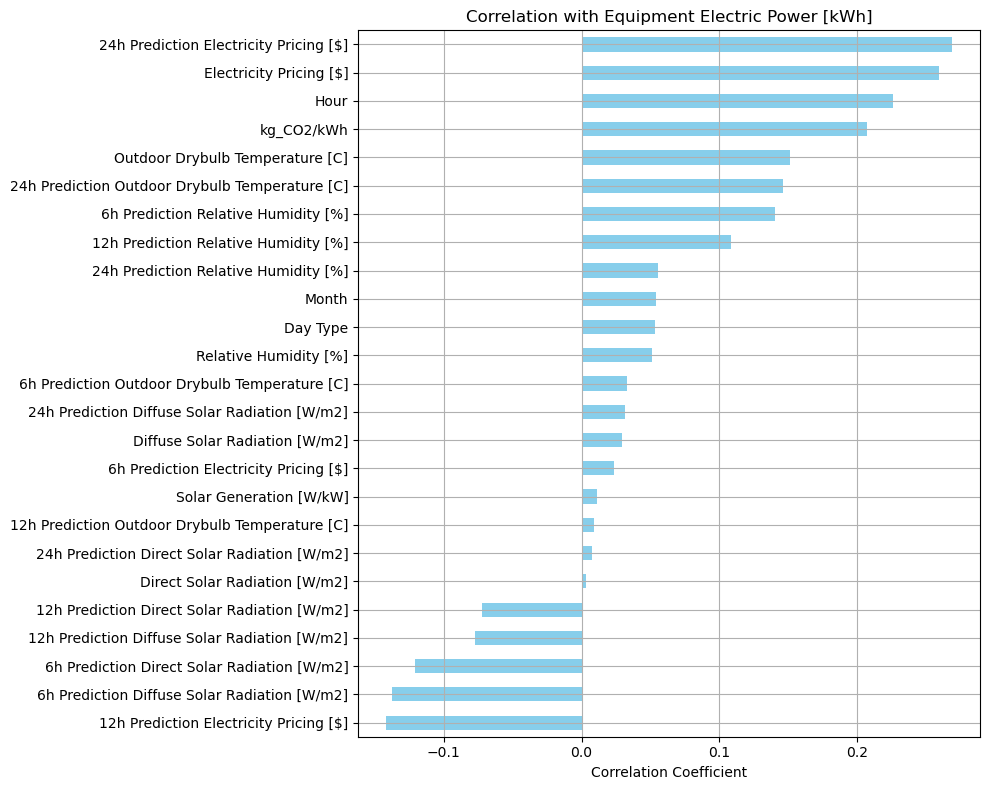

In [34]:
corr_target = correlation['Equipment Electric Power [kWh]'].drop('Equipment Electric Power [kWh]')
corr_target = corr_target.dropna().sort_values()

plt.figure(figsize=(10, 8))
corr_target.plot(kind='barh', color='skyblue')
plt.title('Correlation with Equipment Electric Power [kWh]')
plt.xlabel('Correlation Coefficient')
plt.grid(True)
plt.tight_layout()
plt.show()
